In [1]:
import re #regular expression
import pandas as pd

In [2]:
f = open('_chat2.txt','r',encoding='utf-8')

In [3]:
data= f.read() # reading data in the string form

In [4]:
print(data)

[19/07/2020, 20:15:15] Bakra Trip 2.0: Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[19/07/2020, 20:15:15] Hasan Bhaii: Hasan Bhaii created this group
[20/07/2020, 00:47:08] Bakra Trip 2.0: Hasan Bhaii added you
[20/07/2020, 01:01:54] Talha: Talha left
[20/07/2020, 01:17:38] Fahad Bhaii Taj: Bhai log time se uthjana
[20/07/2020, 01:17:45] Fahad Bhaii Taj: @919871110213
[20/07/2020, 02:22:34] Mohsin Bhai: So liye?
[20/07/2020, 02:22:50] Hasan Bhaii: Hahahahah
[20/07/2020, 02:22:54] Shadab Bhai: Mohsin Bhai added Shadab Bhai
[20/07/2020, 02:23:04] Mohsin Bhai: Z mei aoge?
[20/07/2020, 02:49:56] Fahad Bhaii Taj: Aap ho?
[20/07/2020, 02:53:02] Mohsin Bhai: Mei abhi Q mei
[20/07/2020, 04:45:52] Atyab bhai: Jawaaano
[20/07/2020, 04:45:57] Atyab bhai: Apni apni
[20/07/2020, 04:45:59] Atyab bhai: Haazri
[20/07/2020, 04:46:02] Atyab bhai: Lagao
[20/07/2020, 04:46:07] Hasan Bhaii: Aahuu
[20/07/2020, 04:46:33] Fahad Bhaii

print(type(data))

In [5]:
pattern = r'\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{1,2}\]\s'
print(pattern)


\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{1,2}\]\s


In [6]:
message = re.split(pattern, data)[1:]
message

['Bakra Trip 2.0: Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 'Hasan Bhaii: Hasan Bhaii created this group\n',
 'Bakra Trip 2.0: Hasan Bhaii added you\n',
 'Talha: Talha left\n',
 'Fahad Bhaii Taj: Bhai log time se uthjana\n',
 'Fahad Bhaii Taj: @919871110213\n',
 'Mohsin Bhai: So liye?\n',
 'Hasan Bhaii: Hahahahah\n',
 'Shadab Bhai: Mohsin Bhai added Shadab Bhai\n',
 'Mohsin Bhai: Z mei aoge?\n',
 'Fahad Bhaii Taj: Aap ho?\n',
 'Mohsin Bhai: Mei abhi Q mei\n',
 'Atyab bhai: Jawaaano\n',
 'Atyab bhai: Apni apni\n',
 'Atyab bhai: Haazri\n',
 'Atyab bhai: Lagao\n',
 'Hasan Bhaii: Aahuu\n',
 'Fahad Bhaii Taj: sticker omitted\n',
 'Atyab bhai: Car se jaenge\n',
 'Yasser: Hasan Bhaii added Yasser\n',
 'Atyab bhai: Awr abhi kisi ne tumhari preeti ( bakre ) ko haath nahi lagaya\n',
 'Fahad Bhaii Taj: 😆\n',
 'Hasan Bhaii: Is baar toh bhaai chheen le ayengey\n',
 'Fahad Bhaii Taj: Baaki ladke to soye pade hain\n',

In [7]:
len(message)

211

In [8]:
dates = re.findall(pattern,data)
dates

['[19/07/2020, 20:15:15] ',
 '[19/07/2020, 20:15:15] ',
 '[20/07/2020, 00:47:08] ',
 '[20/07/2020, 01:01:54] ',
 '[20/07/2020, 01:17:38] ',
 '[20/07/2020, 01:17:45] ',
 '[20/07/2020, 02:22:34] ',
 '[20/07/2020, 02:22:50] ',
 '[20/07/2020, 02:22:54] ',
 '[20/07/2020, 02:23:04] ',
 '[20/07/2020, 02:49:56] ',
 '[20/07/2020, 02:53:02] ',
 '[20/07/2020, 04:45:52] ',
 '[20/07/2020, 04:45:57] ',
 '[20/07/2020, 04:45:59] ',
 '[20/07/2020, 04:46:02] ',
 '[20/07/2020, 04:46:07] ',
 '[20/07/2020, 04:46:33] ',
 '[20/07/2020, 04:46:44] ',
 '[20/07/2020, 04:46:47] ',
 '[20/07/2020, 04:47:01] ',
 '[20/07/2020, 04:47:23] ',
 '[20/07/2020, 04:47:34] ',
 '[20/07/2020, 04:47:40] ',
 '[20/07/2020, 04:47:56] ',
 '[20/07/2020, 04:47:58] ',
 '[20/07/2020, 04:48:51] ',
 '[20/07/2020, 04:50:47] ',
 '[20/07/2020, 04:51:43] ',
 '[20/07/2020, 04:52:25] ',
 '[20/07/2020, 04:57:39] ',
 '[20/07/2020, 04:58:15] ',
 '[20/07/2020, 05:07:14] ',
 '[20/07/2020, 05:07:26] ',
 '[20/07/2020, 05:13:12] ',
 '[20/07/2020, 05:14

In [9]:
df = pd.DataFrame({'user_message':message, 'message_date': dates})

# Remove the square brackets '[' and ']' and strip whitespace from the 'message_data' column
df['message_date'] = df['message_date'].str.replace(r'\[|\]', '', regex=True).str.strip()

# Convert 'message_data' to datetime
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M:%S')

# Rename the column
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the DataFrame
# print(df)

df.head()

,user_message,date
0,Bakra Trip 2.0: Messages and calls are end-to-...,2020-07-19 20:15:15
1,Hasan Bhaii: Hasan Bhaii created this group\n,2020-07-19 20:15:15
2,Bakra Trip 2.0: Hasan Bhaii added you\n,2020-07-20 00:47:08
3,Talha: Talha left\n,2020-07-20 01:01:54
4,Fahad Bhaii Taj: Bhai log time se uthjana\n,2020-07-20 01:17:38


In [10]:
df.shape

(211, 2)

In [11]:
# separate users and messages
users=[]
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,date,user,message
0,2020-07-19 20:15:15,Bakra Trip 2.0,Messages and calls are end-to-end encrypted. N...
1,2020-07-19 20:15:15,Hasan Bhaii,Hasan Bhaii created this group\n
2,2020-07-20 00:47:08,Bakra Trip 2.0,Hasan Bhaii added you\n
3,2020-07-20 01:01:54,Talha,Talha left\n
4,2020-07-20 01:17:38,Fahad Bhaii Taj,Bhai log time se uthjana\n


In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head(30)

,date,user,message,year
0,2020-07-19 20:15:15,Bakra Trip 2.0,Messages and calls are end-to-end encrypted. N...,2020
1,2020-07-19 20:15:15,Hasan Bhaii,Hasan Bhaii created this group\n,2020
2,2020-07-20 00:47:08,Bakra Trip 2.0,Hasan Bhaii added you\n,2020
3,2020-07-20 01:01:54,Talha,Talha left\n,2020
4,2020-07-20 01:17:38,Fahad Bhaii Taj,Bhai log time se uthjana\n,2020
5,2020-07-20 01:17:45,Fahad Bhaii Taj,@919871110213\n,2020
6,2020-07-20 02:22:34,Mohsin Bhai,So liye?\n,2020
7,2020-07-20 02:22:50,Hasan Bhaii,Hahahahah\n,2020
8,2020-07-20 02:22:54,Shadab Bhai,Mohsin Bhai added Shadab Bhai\n,2020
9,2020-07-20 02:23:04,Mohsin Bhai,Z mei aoge?\n,2020


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df['day'] = df['date'].dt.day

In [16]:
df.head()

,date,user,message,year,month,day
0,2020-07-19 20:15:15,Bakra Trip 2.0,Messages and calls are end-to-end encrypted. N...,2020,July,19
1,2020-07-19 20:15:15,Hasan Bhaii,Hasan Bhaii created this group\n,2020,July,19
2,2020-07-20 00:47:08,Bakra Trip 2.0,Hasan Bhaii added you\n,2020,July,20
3,2020-07-20 01:01:54,Talha,Talha left\n,2020,July,20
4,2020-07-20 01:17:38,Fahad Bhaii Taj,Bhai log time se uthjana\n,2020,July,20


In [17]:
df['hour'] = df['date'].dt.hour

In [18]:
df['minute'] = df['date'].dt.minute

In [19]:
df.head

<bound method NDFrame.head of                    date               user  \
0   2020-07-19 20:15:15     Bakra Trip 2.0   
1   2020-07-19 20:15:15        Hasan Bhaii   
2   2020-07-20 00:47:08     Bakra Trip 2.0   
3   2020-07-20 01:01:54              Talha   
4   2020-07-20 01:17:38    Fahad Bhaii Taj   
..                  ...                ...   
206 2020-08-03 12:24:11        Hasan Bhaii   
207 2020-08-03 12:26:28         Atyab bhai   
208 2020-08-03 12:26:42             Yasser   
209 2021-01-12 18:19:40  Sheeraz Bhaii Taj   
210 2021-10-29 13:09:12        Hasan Bhaii   

                                               message  year    month  day  \
0    Messages and calls are end-to-end encrypted. N...  2020     July   19   
1                     Hasan Bhaii created this group\n  2020     July   19   
2                              Hasan Bhaii added you\n  2020     July   20   
3                                         Talha left\n  2020     July   20   
4                          

In [20]:
words = []
for message in df['message']:
    words.extend(message.split())

In [21]:
len(words)

739

In [22]:
    df[df['message'] == '<image omitted>\n'].shape[0]

6

In [23]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [24]:
from urlextract import URLExtract

extractor = URLExtract()
text = "Let's have a URL gmail.com. Visit stackoverflow.com! Check out facebook.com, for example, google.com"
urls = extractor.find_urls(text)
print(urls)

['gmail.com', 'facebook.com', 'google.com']


In [25]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [26]:
links

['https://maps.app.goo.gl/CUCXjSkLEzDR1gJj6']

In [27]:
x = df['user'].value_counts().head()

In [28]:
import matplotlib.pyplot as plt

In [29]:
name = x.index
count = x.values

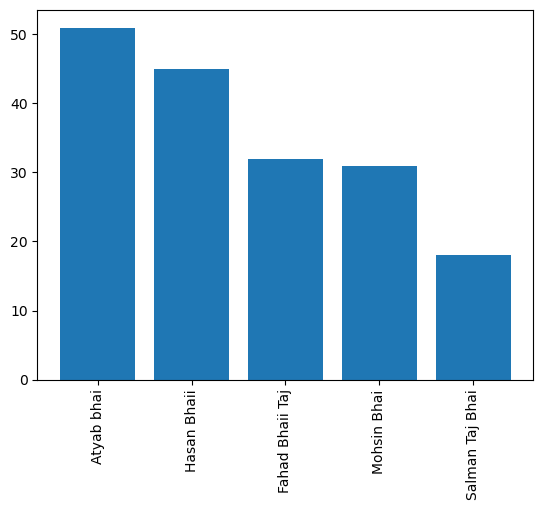

In [30]:
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'}) #dividing by total number of messages

,name,percent
0,Atyab bhai,24.17
1,Hasan Bhaii,21.33
2,Fahad Bhaii Taj,15.17
3,Mohsin Bhai,14.69
4,Salman Taj Bhai,8.53
5,Yasser,5.69
6,Sheeraz Bhaii Taj,3.79
7,Shadab Bhai,2.37
8,Adil Bhaii,1.90
9,Bakra Trip 2.0,0.95


In [32]:
temp = df[df['user'] !='Bakra Trip 2.0']
temp = temp[temp['message'] != '<image omitted>\n']
temp = temp[temp['message'] != 'video omitted\n']
temp = temp[temp['message'] != 'audio omitted\n']

In [33]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [34]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word is not stop_words:
            words.append(word)
    words.extend(message.split())

In [35]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,bhai,38
1,hai,38
2,se,22
3,to,16
4,k,16
5,hain,12
6,ho,11
7,group,10
8,ne,10
9,mein,10


In [36]:
pip uninstall emoji

^C
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install emoji==1.7.0

Note: you may need to restart the kernel to use updated packages.


In [36]:
import emoji

In [37]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])



In [38]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df

,0,1
0,😍,4
1,✋,2
2,🏻,2
3,😆,1
4,😅,1
5,😂,1
6,🎉,1
7,🙌,1


C:\Users\arham\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9995 (\N{RAISED HAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\arham\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


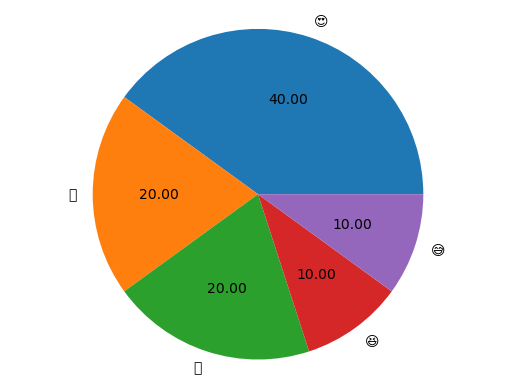

In [39]:

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(emoji_df[1].head(), labels=emoji_df[0].head(), autopct="%0.2f")

# Set aspect ratio to make it a circle (optional)
ax.axis('equal')

# Show the pie chart
plt.show()

In [40]:
df['month_num'] = df['date'].dt.month

In [41]:
df['month_num']

0       7
1       7
2       7
3       7
4       7
       ..
206     8
207     8
208     8
209     1
210    10
Name: month_num, Length: 211, dtype: int64

In [42]:
timeline = df.groupby(['year','month','month_num']).count()['message'].reset_index()

In [43]:
timeline

,year,month,month_num,message
0,2020,August,8,5
1,2020,July,7,204
2,2021,January,1,1
3,2021,October,10,1


In [44]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [45]:
time

['August-2020', 'July-2020', 'January-2021', 'October-2021']

In [46]:
timeline['time'] = time

In [47]:
timeline

,year,month,month_num,message,time
0,2020,August,8,5,August-2020
1,2020,July,7,204,July-2020
2,2021,January,1,1,January-2021
3,2021,October,10,1,October-2021


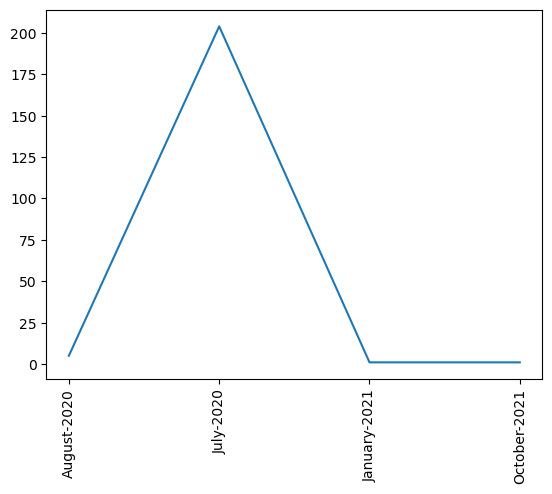

In [48]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
df['only_date'] = df['date'].dt.date
df['only_date']

0      2020-07-19
1      2020-07-19
2      2020-07-20
3      2020-07-20
4      2020-07-20
          ...    
206    2020-08-03
207    2020-08-03
208    2020-08-03
209    2021-01-12
210    2021-10-29
Name: only_date, Length: 211, dtype: object

In [50]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2020-07-19,2
1,2020-07-20,162
2,2020-07-21,39
3,2020-07-30,1
4,2020-08-03,5
5,2021-01-12,1
6,2021-10-29,1


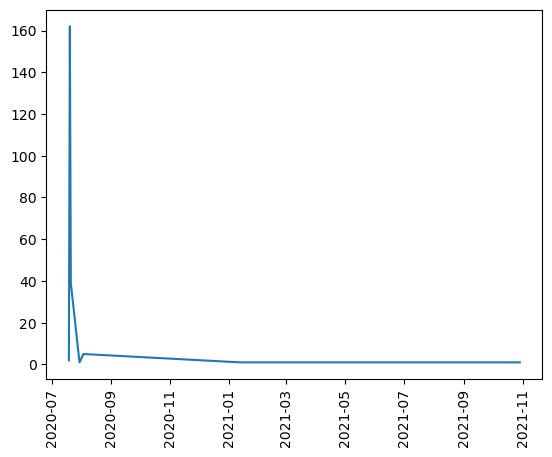

In [51]:
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
df['day_name'] = df['date'].dt.day_name()

In [54]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2020-07-19 20:15:15,Bakra Trip 2.0,Messages and calls are end-to-end encrypted. N...,2020,July,19,20,15,7,2020-07-19,Sunday
1,2020-07-19 20:15:15,Hasan Bhaii,Hasan Bhaii created this group\n,2020,July,19,20,15,7,2020-07-19,Sunday
2,2020-07-20 00:47:08,Bakra Trip 2.0,Hasan Bhaii added you\n,2020,July,20,0,47,7,2020-07-20,Monday
3,2020-07-20 01:01:54,Talha,Talha left\n,2020,July,20,1,1,7,2020-07-20,Monday
4,2020-07-20 01:17:38,Fahad Bhaii Taj,Bhai log time se uthjana\n,2020,July,20,1,17,7,2020-07-20,Monday
...,...,...,...,...,...,...,...,...,...,...,...
206,2020-08-03 12:24:11,Hasan Bhaii,video omitted\n,2020,August,3,12,24,8,2020-08-03,Monday
207,2020-08-03 12:26:28,Atyab bhai,Alhamdulilah\n\nAllah mian qubool kare\n,2020,August,3,12,26,8,2020-08-03,Monday
208,2020-08-03 12:26:42,Yasser,Ameen\n,2020,August,3,12,26,8,2020-08-03,Monday
209,2021-01-12 18:19:40,Sheeraz Bhaii Taj,Sheeraz Bhaii Taj left\n,2021,January,12,18,19,1,2021-01-12,Tuesday


In [55]:
df['day_name'].value_counts()

Monday      167
Tuesday      40
Sunday        2
Thursday      1
Friday        1
Name: day_name, dtype: int64

In [57]:
periods = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        periods.append(str(hour)+ "-"+str('00') )
    elif hour == 0:
        periods.append(str('00')+"-"+str(hour+1))
    else:
        periods.append(str(hour)+"-"+str(hour+1))

In [58]:
df['period'] = periods

In [59]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2020-07-19 20:15:15,Bakra Trip 2.0,Messages and calls are end-to-end encrypted. N...,2020,July,19,20,15,7,2020-07-19,Sunday,20-21
1,2020-07-19 20:15:15,Hasan Bhaii,Hasan Bhaii created this group\n,2020,July,19,20,15,7,2020-07-19,Sunday,20-21
2,2020-07-20 00:47:08,Bakra Trip 2.0,Hasan Bhaii added you\n,2020,July,20,0,47,7,2020-07-20,Monday,00-1
3,2020-07-20 01:01:54,Talha,Talha left\n,2020,July,20,1,1,7,2020-07-20,Monday,1-2
4,2020-07-20 01:17:38,Fahad Bhaii Taj,Bhai log time se uthjana\n,2020,July,20,1,17,7,2020-07-20,Monday,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-08-03 12:24:11,Hasan Bhaii,video omitted\n,2020,August,3,12,24,8,2020-08-03,Monday,12-13
207,2020-08-03 12:26:28,Atyab bhai,Alhamdulilah\n\nAllah mian qubool kare\n,2020,August,3,12,26,8,2020-08-03,Monday,12-13
208,2020-08-03 12:26:42,Yasser,Ameen\n,2020,August,3,12,26,8,2020-08-03,Monday,12-13
209,2021-01-12 18:19:40,Sheeraz Bhaii Taj,Sheeraz Bhaii Taj left\n,2021,January,12,18,19,1,2021-01-12,Tuesday,18-19


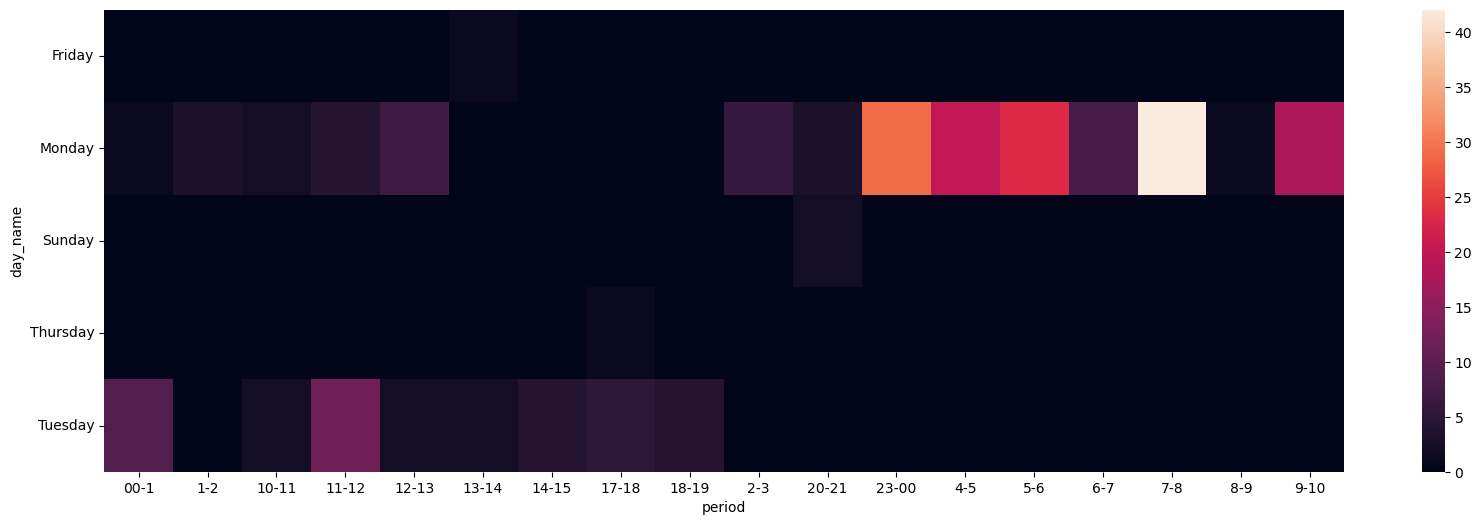

In [60]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()